## Sequential

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
from module import Module
from linear import Linear
from activation import TanH, Sigmoid, ReLU
from sequential import Sequential
from loss import MSELoss
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def train(net, loss_fn, X_train, y_train, learning_rate):
    net.zero_grad()
    y_pred = net(X_train)
    loss = loss_fn(y_train, y_pred).mean()
    delta = loss_fn.backward(y_train, y_pred)
    net.backward_update_gradient(X_train, delta)
    net.update_parameters(learning_rate)
    return loss

In [4]:
def train_evaluate_loop(net, loss_fn, X_train, y_train, X_test, y_test, evaluate_fn, learning_rate=1e-3, n_epochs=1_000):
    train_loss = []
    test_loss = []
    test_acc = []
    for epoch in range(n_epochs):
        epoch_train_loss = train(net, loss_fn, X_train, y_train, learning_rate)
        epoch_test_loss, epoch_test_acc = evaluate_fn(net, loss_fn, X_test, y_test)
        train_loss.append(epoch_train_loss)
        test_loss.append(epoch_test_loss)
        test_acc.append(epoch_test_acc)
        if (epoch + 1) % (n_epochs // 10) == 0:
            print(f"Epoch {epoch + 1}: train loss = {epoch_train_loss:.4f}, test loss = {epoch_test_loss:.4f}, test acc = {epoch_test_acc:.4f}")
    return train_loss, test_loss, test_acc

### Linear + TanH + Linear + Sigmoid

In [5]:
def LTLS(input, hidden, output):
    return Sequential(
        Linear(input, hidden),
        TanH(),
        Linear(hidden, output),
        Sigmoid()
    )

In [6]:
def generate_data_ltls(input, hidden, output, n_samples=1_000):
    np.random.seed(42)
    X = np.random.randn(n_samples, input)
    W1 = np.random.random((input, hidden))
    W2 = np.random.random((hidden, output))
    y = Sigmoid() ((TanH() ((X @ W1+ np.random.random()))) @ W2 + np.random.random()).reshape(-1)
    y = np.where(y >= .5, 1, 0)
    return X, y

In [7]:
def evaluate_ltls(net, loss_fn, X_test, y_test):
    yhat = net(X_test)
    loss = loss_fn(y_test, yhat).mean()
    acc = ((yhat >= 0.5).astype(int) == y_test).mean()
    return loss, acc

In [8]:
net = LTLS(2, 10, 1)
X, y = generate_data_ltls(2, 10, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
loss_fn = MSELoss()
train_loss, test_loss, test_acc = train_evaluate_loop(net, loss_fn, X_train, y_train, X_test, y_test, evaluate_ltls,  1e-3, 10_000)

Epoch 1000: train loss = 0.2009, test loss = 0.2127, test acc = 0.5710
Epoch 2000: train loss = 0.1643, test loss = 0.1719, test acc = 0.6136
Epoch 3000: train loss = 0.1371, test loss = 0.1412, test acc = 0.6207
Epoch 4000: train loss = 0.1174, test loss = 0.1187, test acc = 0.6597
Epoch 5000: train loss = 0.1031, test loss = 0.1025, test acc = 0.6953
Epoch 6000: train loss = 0.0926, test loss = 0.0906, test acc = 0.7059
Epoch 7000: train loss = 0.0847, test loss = 0.0818, test acc = 0.7343
Epoch 8000: train loss = 0.0786, test loss = 0.0750, test acc = 0.7485
Epoch 9000: train loss = 0.0738, test loss = 0.0696, test acc = 0.7520
Epoch 10000: train loss = 0.0697, test loss = 0.0653, test acc = 0.7520


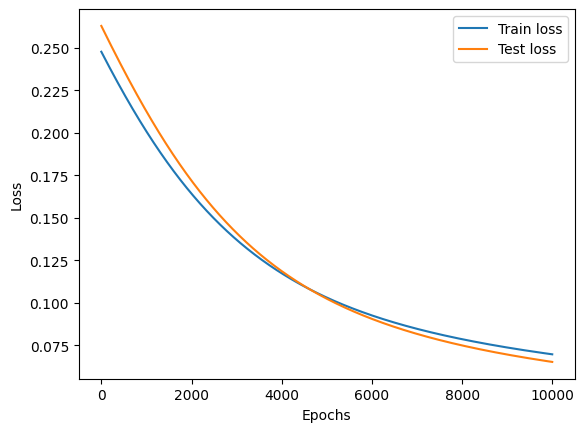

In [9]:
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

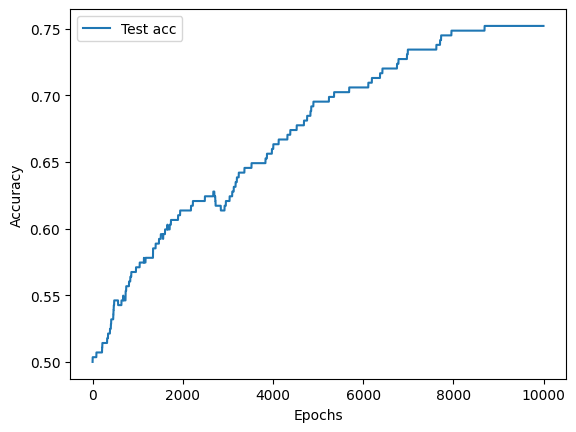

In [10]:
plt.plot(test_acc, label='Test acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()